In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import Q_
from atomtoolkit.atom import Atom, Transition, BaseLevel, ZLevel, HFLevel
import atomtoolkit.render.grotrian as grt
import numpy as np
from pprint import pprint

In [2]:
a = Atom.load('species/Yb_II_173.atom')
a.B = Q_(5.0, 'G')

In [3]:
# plt.figure(figsize=(15, 15))
# grt.draw_levels(a)
# plt.show()

In [4]:
g = grt.Grotrian()
g.add_level(a.levels['4f14.6s 2S1/2']['F=2'], strategy='z', color=(1, 0, 0, 1), y1=400, z_scale=200)
g.add_level(a.levels['4f14.6s 2S1/2']['F=2']['mF=0'], strategy='z', color=(0, 0, 1, 0.5), squeeze=False, y1=400, linewidth=10, z_scale=200)
g.add_level(a.levels['4f14.6s 2S1/2']['F=3'], strategy='z', color=(0, 1, 0, 1), y1=400, z_scale=200)

g.add_level(a.levels['4f13.(2F*).6s2 2F*7/2'], strategy='z', hf_scale=40000.0, spacing=1.0, squeeze=False, color=(1, 0, 1, 1), linewidth=3)
g.add_level(a.levels['4f14.5d 2D3/2'], strategy='hf',  hf_scale=40000.0, color=(0,0,0,0.3), sublevel_width='schematic', spacing='schematic')
g.add_level(a.levels['4f14.5d 2D5/2'], strategy='z', hf_scale=50000.0, bbox='bracket')
g.add_level(a.levels['4f14.6p 2P*1/2'], strategy='z', x1=0.25)
g.add_level(a.levels['4f14.6p 2P*3/2'], strategy='hf', color=(0,0,0,0.3),  hf_scale=20000.0, sublevel_width='schematic', spacing='schematic', offset=0.1)
g.add_level(a.levels['4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2'], strategy='z')
g.add_level(a.levels['4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2'], strategy='z', bbox='rect', x1=0.5)

# g.add_transition(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')], 
#                  start_anchor=2, end_anchor=8, 
#                  alpha=1, mutation_scale=10)

In [6]:
g.level_prompts

,level,strategy,kwargs
0,"[mF=-2, mF=-1, mF=0, mF=1, mF=2]",<bound method Grotrian.zeeman_level_table of <...,"{'color': (1, 0, 0, 1), 'y1': 400, 'z_scale': ..."
1,[],<bound method Grotrian.zeeman_level_table of <...,"{'color': (0, 0, 1, 0.5), 'squeeze': False, 'y..."
2,"[mF=-3, mF=-2, mF=-1, mF=0, mF=1, mF=2, mF=3]",<bound method Grotrian.zeeman_level_table of <...,"{'color': (0, 1, 0, 1), 'y1': 400, 'z_scale': ..."
3,"[F=1, F=2, F=3, F=4, F=5, F=6]",<bound method Grotrian.zeeman_level_table of <...,"{'hf_scale': 40000.0, 'spacing': 1.0, 'squeeze..."
4,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.hf_level_table of <atom...,"{'hf_scale': 40000.0, 'color': (0, 0, 0, 0.3),..."
5,"[F=0, F=1, F=2, F=3, F=4, F=5]",<bound method Grotrian.zeeman_level_table of <...,"{'hf_scale': 50000.0, 'bbox': 'bracket'}"
6,"[F=2, F=3]",<bound method Grotrian.zeeman_level_table of <...,{'x1': 0.25}
7,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.hf_level_table of <atom...,"{'color': (0, 0, 0, 0.3), 'hf_scale': 20000.0,..."
8,"[F=2, F=3]",<bound method Grotrian.zeeman_level_table of <...,{}
9,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.zeeman_level_table of <...,"{'bbox': 'rect', 'x1': 0.5}"


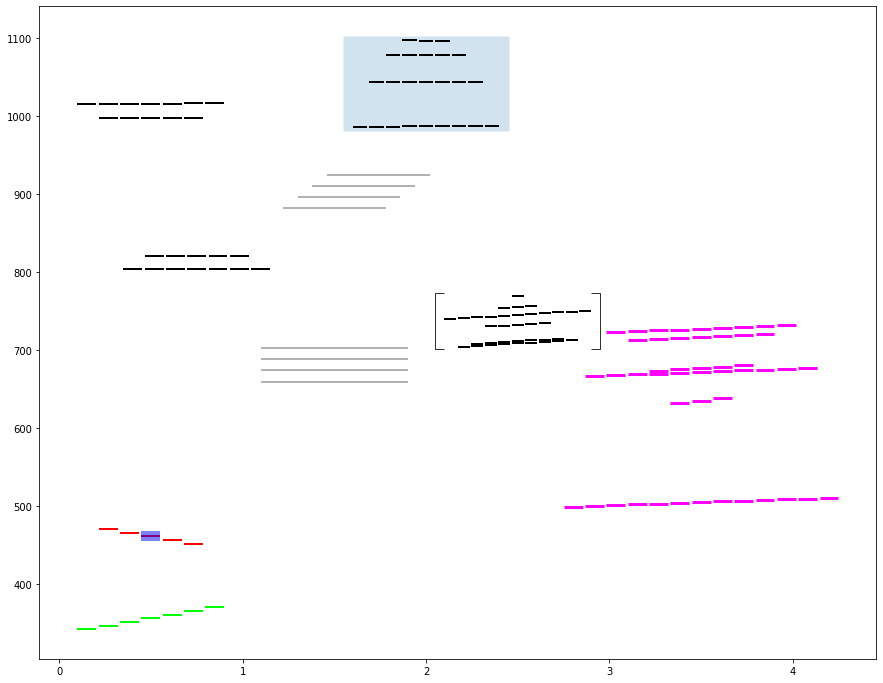

In [7]:
from matplotlib.patches import FancyArrowPatch
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots(figsize=(15, 12))
g.render(ax)
ax.autoscale()
plt.show()

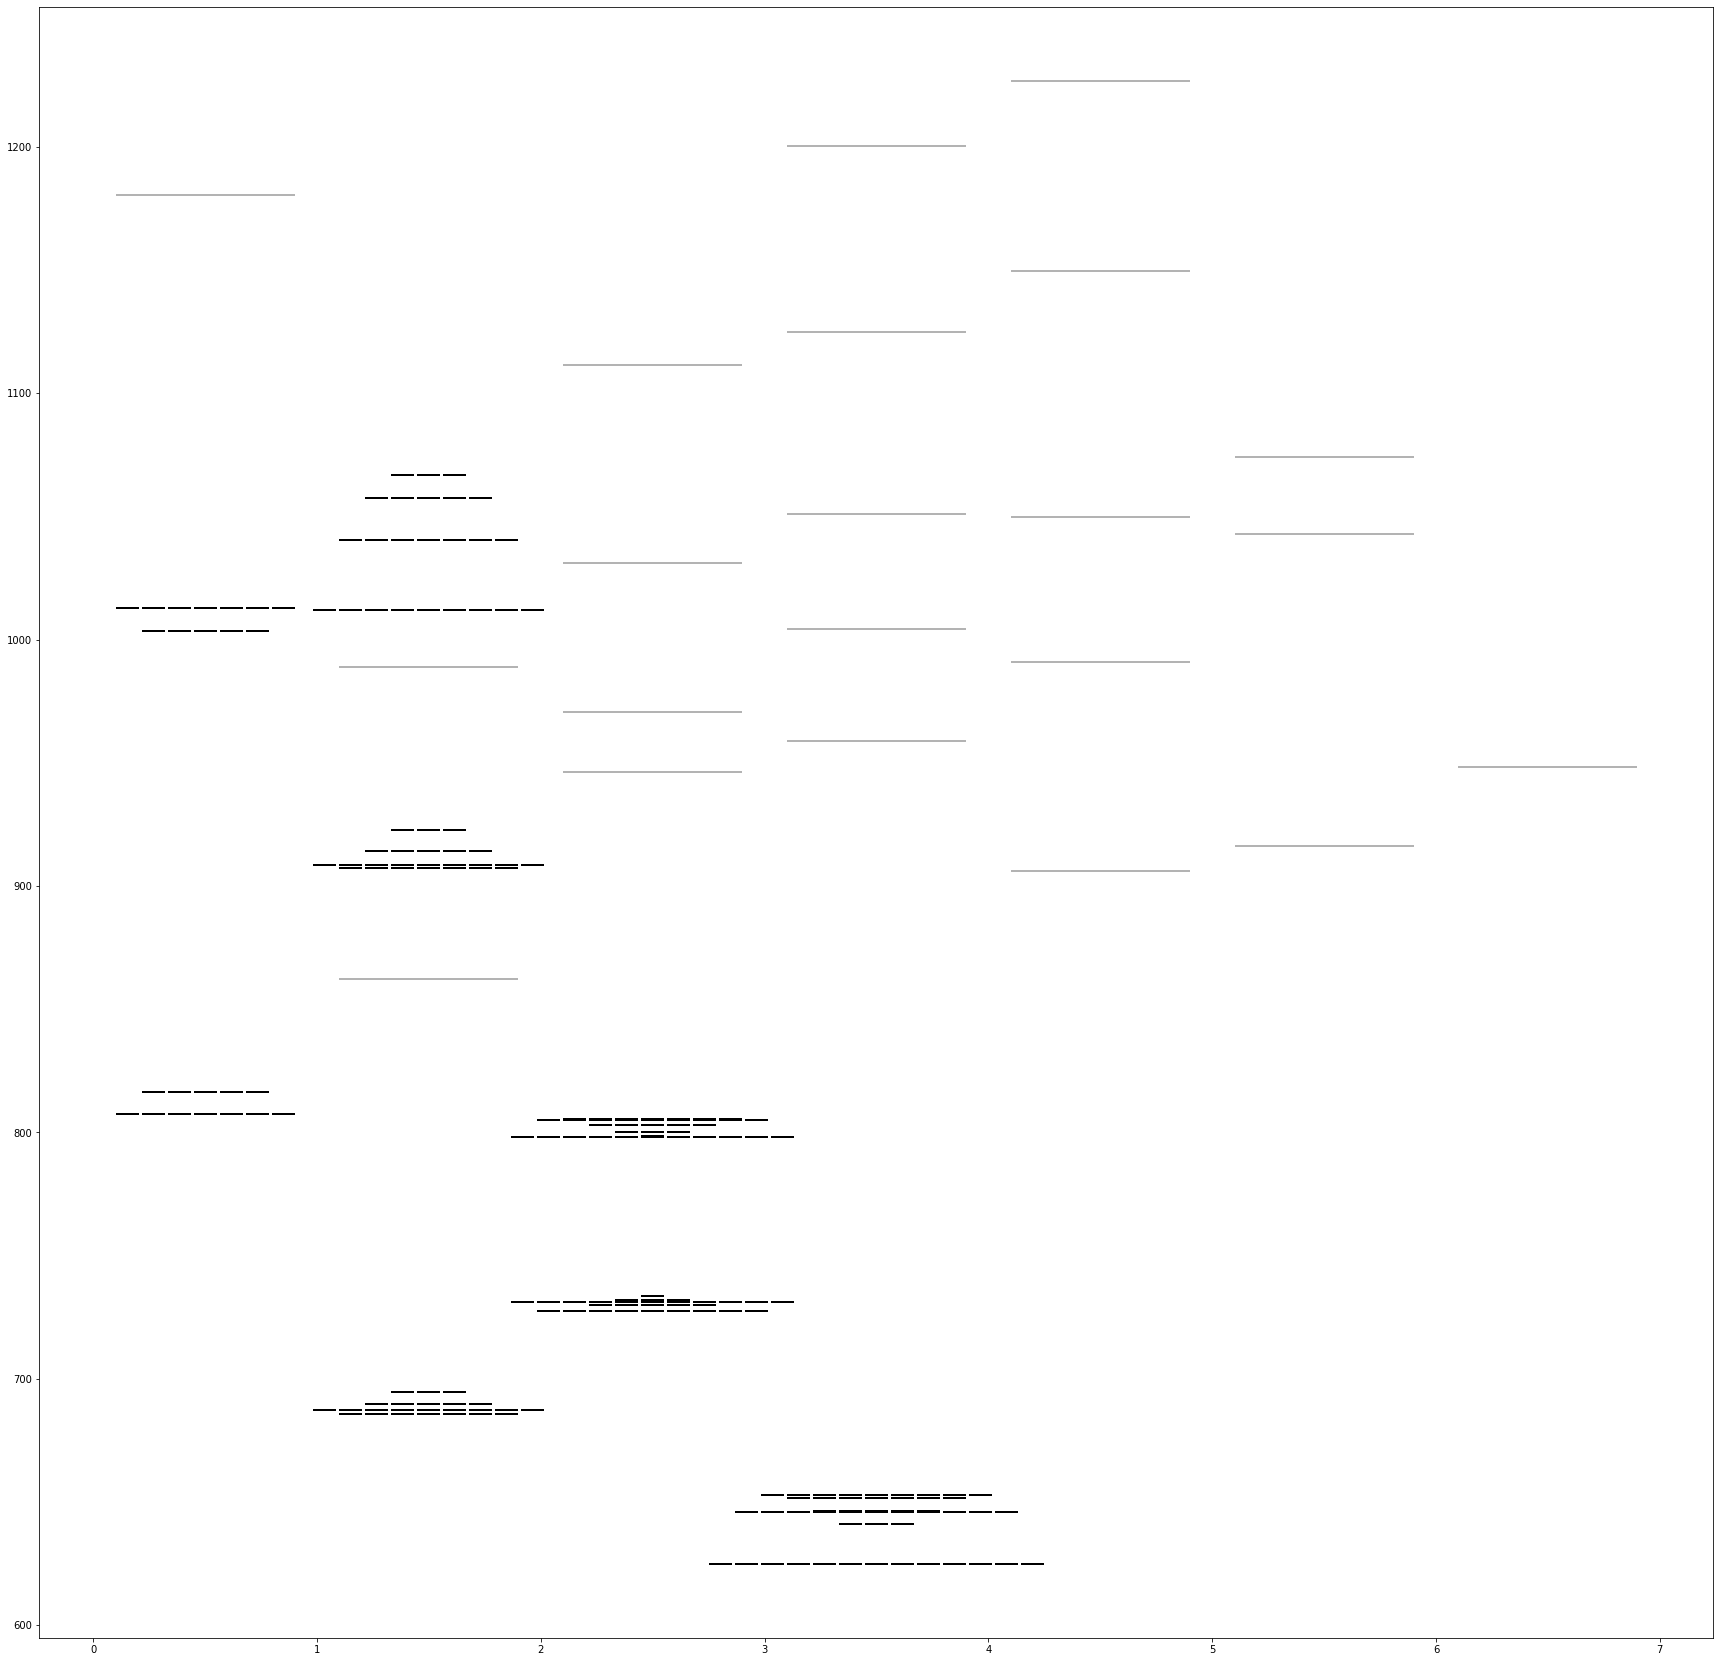

In [7]:
g2 = grt.Grotrian()
for level in a.levels[1:30]:
    if level.hfA != 0:
        g2.add_level(level, strategy='z', linewidth=2, z_scale=0, fill_factor=.9, hf_scale=5000, squeeze=False)
    else:
        g2.add_level(level, strategy='gross', linewidth=2 , color=(.7, .7, .7, 1))

    
fig, ax = plt.subplots(figsize=(30, 30))
g2.render(ax)
ax.autoscale()
plt.show()

In [8]:
# a.levels.list_names()

In [9]:
display(g.gross_level_table(a.levels['4f14.5d 2D5/2']))
display(g.hf_level_table(a.levels['4f14.5d 2D5/2']))
display(g.zeeman_level_table(a.levels['4f14.5d 2D5/2']))

,level,show,p0,p1,bbox,kwargs
0,"[F=0, F=1, F=2, F=3, F=4, F=5]",True,"(2.1, 729.47609)","(2.9, 729.47609)","(2.0500000000000003, 729.47609, 2.949999999999...",{}


,level,show,p0,p1,bbox,kwargs
0,[mF=0],True,"(2.482608695652174, 737.505265)","(2.517391304347826, 737.505265)","(2.432608695652174, 737.505265, 2.567391304347...",{'bbox': None}
1,"[mF=-1, mF=0, mF=1]",True,"(2.4478260869565216, 734.683005)","(2.5521739130434784, 734.683005)","(2.3978260869565218, 734.683005, 2.60217391304...",{'bbox': None}
2,"[mF=-2, mF=-1, mF=0, mF=1, mF=2]",True,"(2.4130434782608696, 730.109845)","(2.5869565217391304, 730.109845)","(2.36304347826087, 730.109845, 2.6369565217391...",{'bbox': None}
3,"[mF=-3, mF=-2, mF=-1, mF=0, mF=1, mF=2, mF=3]",True,"(2.378260869565217, 725.928505)","(2.621739130434783, 725.928505)","(2.3282608695652174, 725.928505, 2.67173913043...",{'bbox': None}
4,"[mF=-4, mF=-3, mF=-2, mF=-1, mF=0, mF=1, mF=2,...",True,"(2.3434782608695652, 725.353065)","(2.6565217391304348, 725.353065)","(2.2934782608695654, 725.353065, 2.70652173913...",{'bbox': None}
5,"[mF=-5, mF=-4, mF=-3, mF=-2, mF=-1, mF=0, mF=1...",True,"(2.3086956521739133, 732.668965)","(2.6913043478260867, 732.668965)","(2.2586956521739134, 732.668965, 2.74130434782...",{'bbox': None}
6,"[F=0, F=1, F=2, F=3, F=4, F=5]",False,"(2.1, 729.47609)","(2.9, 729.47609)","(2.2586956521739134, 724.745455, 2.74130434782...",{}


,level,show,p0,p1,bbox,kwargs
0,[],True,"(2.4672727272727273, 737.505265)","(2.5327272727272727, 737.505265)","(2.4172727272727275, 737.505265, 2.58272727272...",{'bbox': None}
1,[mF=0],False,"(2.482608695652174, 737.505265)","(2.517391304347826, 737.505265)","(2.4172727272727275, 737.505265, 2.58272727272...",{'bbox': None}
2,[],True,"(2.393818181818182, 734.4727114198352)","(2.4592727272727273, 734.4727114198352)","(2.343818181818182, 734.4727114198352, 2.50927...",{'bbox': None}
3,[],True,"(2.4672727272727273, 734.683005)","(2.5327272727272727, 734.683005)","(2.4172727272727275, 734.683005, 2.58272727272...",{'bbox': None}
4,[],True,"(2.5407272727272727, 734.8932985801649)","(2.606181818181818, 734.8932985801649)","(2.490727272727273, 734.8932985801649, 2.65618...",{'bbox': None}
5,"[mF=-1, mF=0, mF=1]",False,"(2.4478260869565216, 734.683005)","(2.5521739130434784, 734.683005)","(2.343818181818182, 734.4516820618187, 2.65618...",{'bbox': None}
6,[],True,"(2.3203636363636364, 729.6892578396702)","(2.385818181818182, 729.6892578396702)","(2.2703636363636366, 729.6892578396702, 2.4358...",{'bbox': None}
7,[],True,"(2.393818181818182, 729.8995514198351)","(2.4592727272727273, 729.8995514198351)","(2.343818181818182, 729.8995514198351, 2.50927...",{'bbox': None}
8,[],True,"(2.4672727272727273, 730.109845)","(2.5327272727272727, 730.109845)","(2.4172727272727275, 730.109845, 2.58272727272...",{'bbox': None}
9,[],True,"(2.5407272727272727, 730.3201385801649)","(2.606181818181818, 730.3201385801649)","(2.490727272727273, 730.3201385801649, 2.65618...",{'bbox': None}


In [8]:
g.levels_df

,level,strategy,bbox,kwargs
0,"[mF=-2, mF=-1, mF=0, mF=1, mF=2]",<bound method Grotrian.zeeman_level_table of <...,None,"{'color': (1, 0, 0, 1), 'y1': 400, 'z_scale': ..."
1,[],<bound method Grotrian.zeeman_level_table of <...,None,"{'color': (0, 0, 1, 0.5), 'squeeze': False, 'y..."
2,"[mF=-3, mF=-2, mF=-1, mF=0, mF=1, mF=2, mF=3]",<bound method Grotrian.zeeman_level_table of <...,None,"{'color': (0, 1, 0, 1), 'y1': 400, 'z_scale': ..."
3,"[F=1, F=2, F=3, F=4, F=5, F=6]",<bound method Grotrian.zeeman_level_table of <...,None,"{'hf_scale': 40000.0, 'spacing': 1.0, 'squeeze..."
4,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.hf_level_table of <atom...,None,"{'hf_scale': 40000.0, 'color': (0, 0, 0, 0.3),..."
5,"[F=0, F=1, F=2, F=3, F=4, F=5]",<bound method Grotrian.zeeman_level_table of <...,None,"{'hf_scale': 50000.0, 'bbox': 'bracket'}"
6,"[F=2, F=3]",<bound method Grotrian.zeeman_level_table of <...,None,{'x1': 0.25}
7,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.hf_level_table of <atom...,None,"{'color': (0, 0, 0, 0.3), 'hf_scale': 20000.0,..."
8,"[F=2, F=3]",<bound method Grotrian.zeeman_level_table of <...,None,{}
9,"[F=1, F=2, F=3, F=4]",<bound method Grotrian.zeeman_level_table of <...,None,"{'bbox': 'rect', 'x1': 0.5}"


In [11]:
a.levels['4f14.5d 2D3/2']

<EnergyLevel(name = 4f14.5d 2D3/2, level=688347466964640.0 hertz, 4 sublevels)>

In [7]:
import pandas as pd
q = pd.DataFrame({'a': [False, True, False, True], 'b': [1, 2, 3, 4]})

In [8]:
q

,a,b
0,False,1
1,True,2
2,False,3
3,True,4


In [13]:
q[q['a']]['b']

1    2
3    4
Name: b, dtype: int64